In [1]:
import tensorflow as tf
from tensorflow.keras import layers

2023-03-11 01:44:52.152095: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the Boston Housing dataset
boston = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = boston.load_data()



57026/57026 [==============================] - 0s 0us/step


In [3]:
# Normalize the data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std




In [4]:

# Build the model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(13,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=1, validation_data=(x_test, y_test))




Epoch 1/50


2023-03-11 01:44:58.356517: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 01:44:58.358654: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


404/404 [==============================] - 4s 8ms/step - loss: 154.2806 - mae: 8.8050 - val_loss: 29.4496 - val_mae: 4.3221
Epoch 2/50
404/404 [==============================] - 3s 7ms/step - loss: 23.3176 - mae: 3.2172 - val_loss: 26.0670 - val_mae: 3.8708
Epoch 3/50
404/404 [==============================] - 3s 7ms/step - loss: 18.0470 - mae: 2.8374 - val_loss: 20.3981 - val_mae: 3.2822
Epoch 4/50
404/404 [==============================] - 3s 7ms/step - loss: 15.9873 - mae: 2.6280 - val_loss: 18.8547 - val_mae: 2.9765
Epoch 5/50
404/404 [==============================] - 4s 9ms/step - loss: 14.5628 - mae: 2.4995 - val_loss: 17.9552 - val_mae: 2.8785
Epoch 6/50
404/404 [==============================] - 3s 7ms/step - loss: 13.5787 - mae: 2.4436 - val_loss: 17.3283 - val_mae: 2.6737
Epoch 7/50
404/404 [==============================] - 3s 7ms/step - loss: 12.6732 - mae: 2.3233 - val_loss: 18.3905 - val_mae: 2.7191
Epoch 8/50
404/404 [==============================] - 3s 8ms/step - loss

In [5]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test MAE:', test_mae)

4/4 [==============================] - 0s 18ms/step - loss: 14.7294 - mae: 2.4320
Test loss: 14.729445457458496
Test MAE: 2.4320151805877686


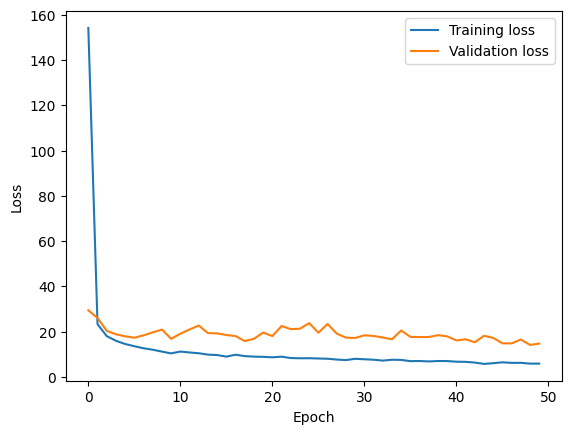

In [6]:
import matplotlib.pyplot as plt
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



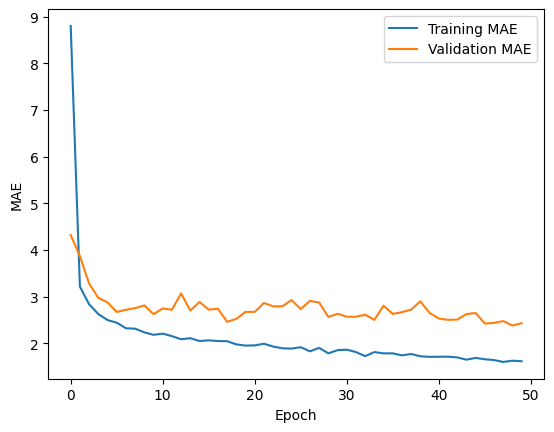

In [7]:
# Plot the training and validation MAE over epochs
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()